In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("stud.csv")

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [44]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 342.8 KB


### Conclusion : No null values found

In [45]:
df.duplicated().sum()

0

### Conclusion : No duplicates found

In [17]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

#### Conclusion : 5 object based and 3 numeric

In [52]:
### Unique categories in each column
for col in df.columns:
    if df[col].dtype=='object':
        print(f"Number of unique values in {col} : {df[col].nunique()}")
        print(f"Unique values in {col} : {df[col].unique()}")
        print()

Number of unique values in gender : 2
Unique values in gender : ['female' 'male']

Number of unique values in race_ethnicity : 5
Unique values in race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E']

Number of unique values in parental_level_of_education : 6
Unique values in parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Number of unique values in lunch : 2
Unique values in lunch : ['standard' 'free/reduced']

Number of unique values in test_preparation_course : 2
Unique values in test_preparation_course : ['none' 'completed']



#### conclusion : All the unique categories identified

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Conclusion : stats of the dataset

#### 1. Since STD is less dispersion of the data is also less
#### 2. Then data is close to mean
#### 3. Since the STD of three features is almost the same thier dist is alsp same

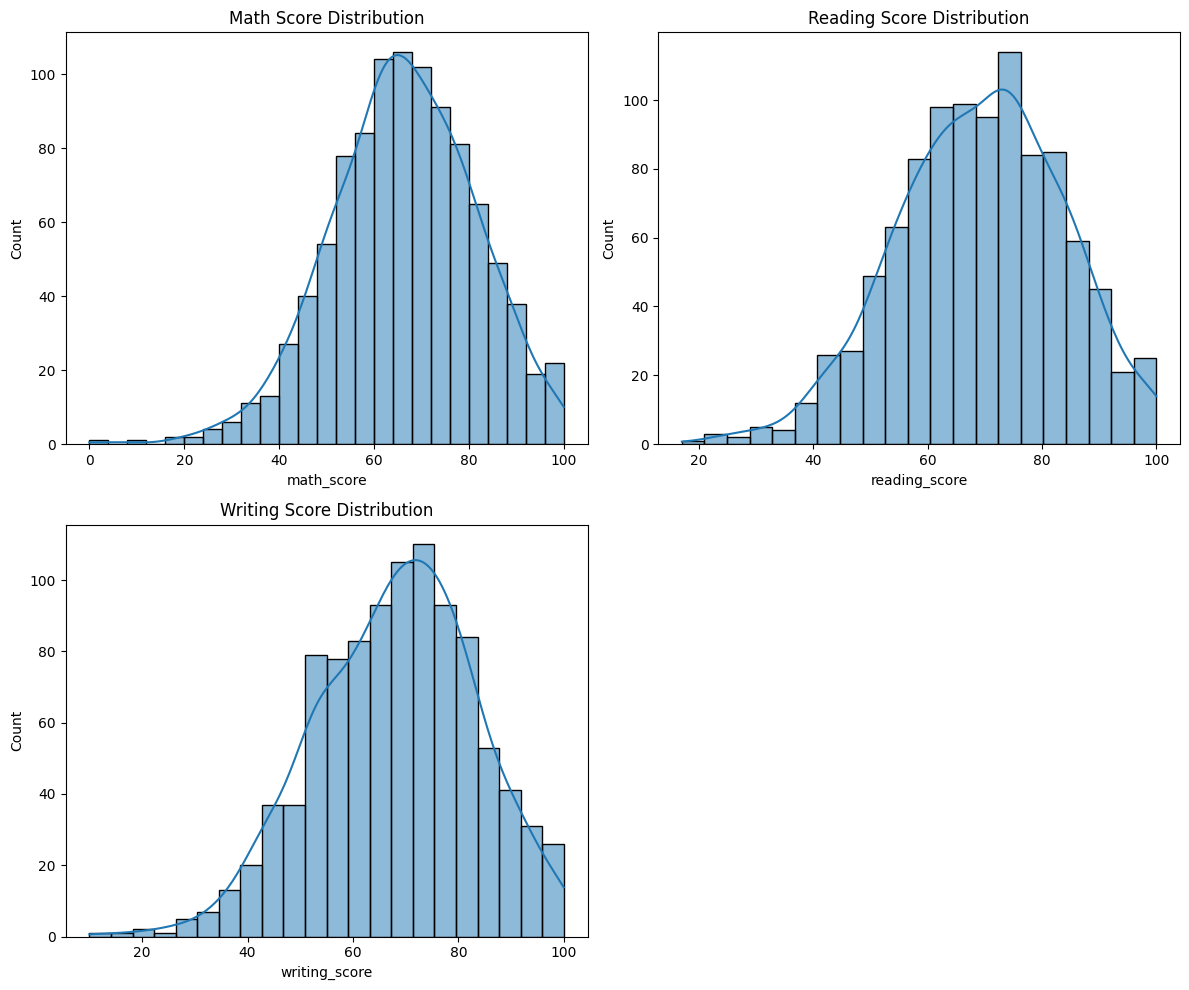

<Figure size 640x480 with 0 Axes>

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distributions
sns.histplot(df['math_score'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Math Score Distribution')

sns.histplot(df['reading_score'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Reading Score Distribution')

sns.histplot(df['writing_score'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Writing Score Distribution')

# Remove the empty subplot (bottom-right)
axes[1, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


plt.savefig("seaborn_plot.png", dpi=300, bbox_inches='tight')

<Axes: >

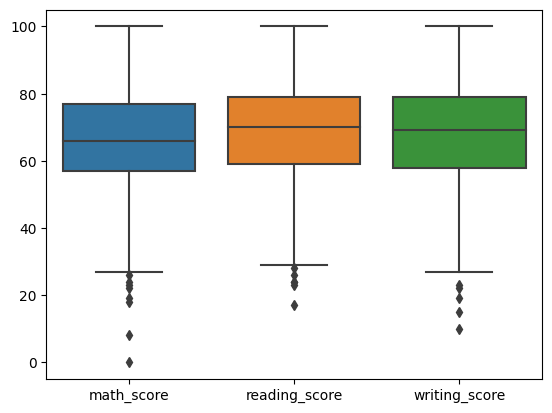

In [38]:
sns.boxplot(data=df[['math_score', 'reading_score', 'writing_score']])

### Conlusion on normal distribution :

**Histograms with KDE (Top 3 Plots)**

*Math Score & Reading Score:* These appear approximately bell-shaped and symmetric, suggesting normality.
*Writing Score:* Shows some skewness (slightly right-skewed).

**Boxplot (Bottom Plot)**

The distributions have some outliers (especially in writing scores), but most of the data is centered around the mean with a reasonable spread.

**Conclusion:**
Math and Reading Scores: Close to normal, but should be confirmed with statistical tests (Shapiro-Wilk, KS test).
Writing Score: Slightly skewed, so it may not be perfectly normal.

### Segregate numerical and categorical features 

In [53]:
categorical_features = [col for col in df.columns if df[col].dtype=='object']
numeric_feature = [col for col in df.columns if df[col].dtype!= 'object']
print(categorical_features)
print(numeric_feature)

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
['math_score', 'reading_score', 'writing_score']


### Add new feature

In [55]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['avg_score']=round(df['total_score']/3 , 2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


### Understand the average

<Axes: xlabel='avg_score', ylabel='Count'>

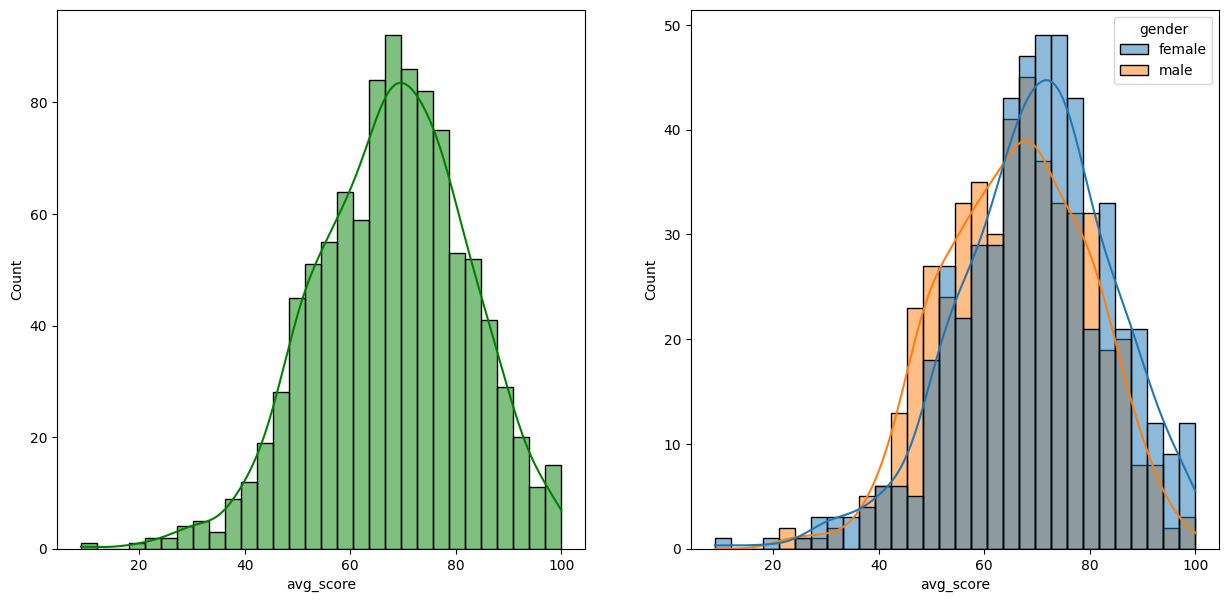

In [58]:
fig , axis=plt.subplots(1  , 2 , figsize=(15 , 7))
plt.subplot(121)
sns.histplot(data=df , x='avg_score' , bins=30 , kde=True , color='g')
plt.subplot(122)
sns.histplot(data=df , x='avg_score' , bins=30 , kde=True , hue='gender')

### Conclusion:

1. Female has better score tha male

In [60]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

<Axes: xlabel='avg_score', ylabel='Count'>

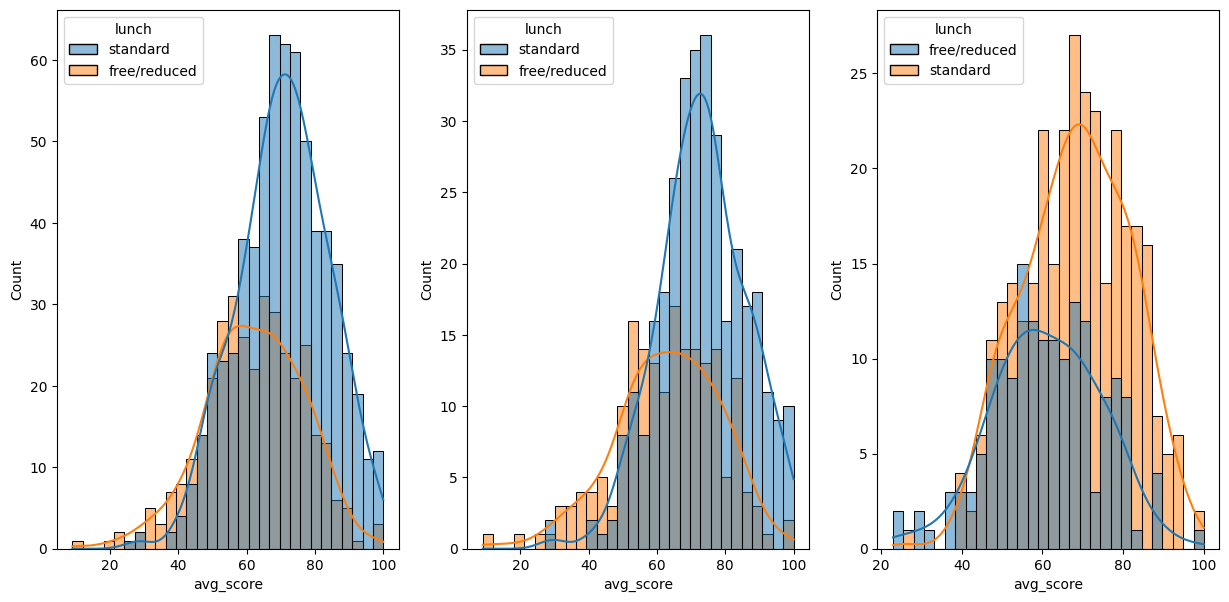

In [98]:
fig , axis=plt.subplots(1  , 3 , figsize=(15 , 7))
plt.subplot(131)
sns.histplot(data=df , x='avg_score' , bins=30 , kde=True ,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'] , x='avg_score' , bins=30 , kde=True , hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'] , x='avg_score' , bins=30  , kde=True , hue='lunch')

#### Conlcusion : 

1. Standard lunch helps student to score better in exam
2. This applicable for both male and female

In [96]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

<Axes: xlabel='avg_score', ylabel='Count'>

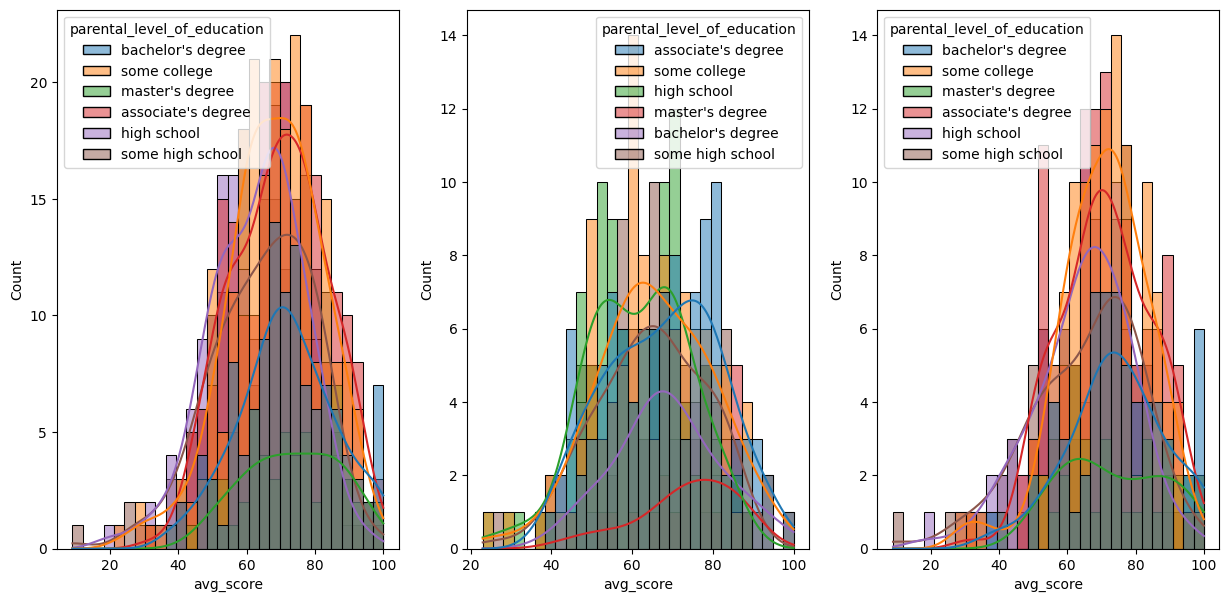

In [102]:
fig , axis = plt.subplots(1 , 3 , figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df , x='avg_score' , bins=30 , hue='parental_level_of_education' , kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'] , x='avg_score' , bins=30 , hue='parental_level_of_education' , kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=="female"] , x="avg_score" , bins=30 , hue="parental_level_of_education" ,kde=True)

<Axes: xlabel='avg_score', ylabel='Count'>

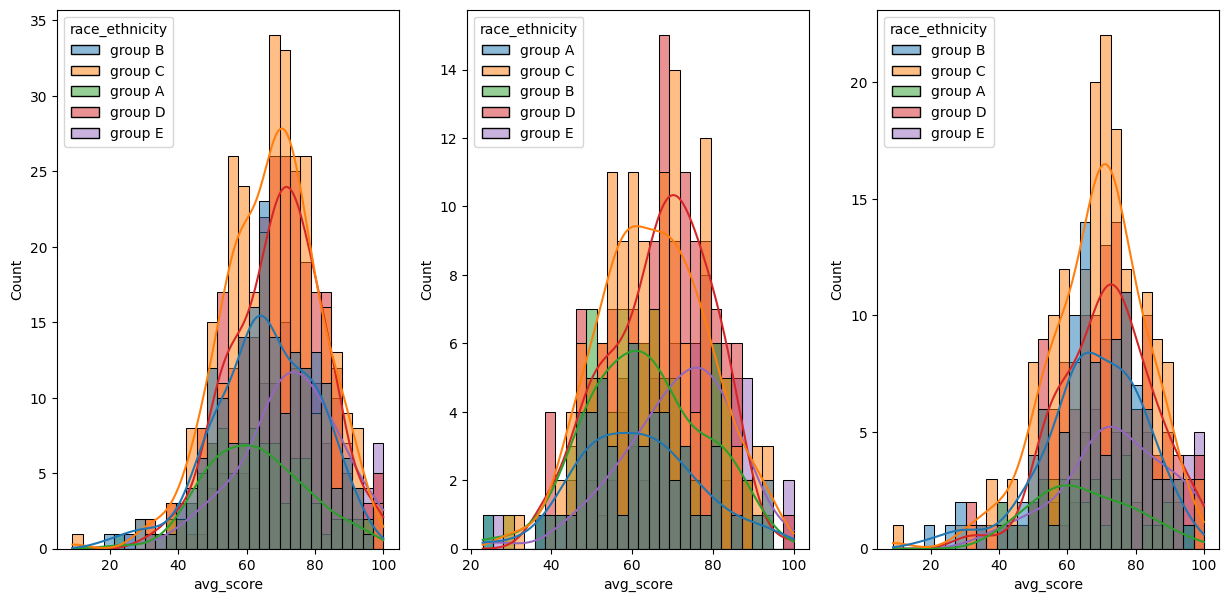

In [103]:
fig , axis = plt.subplots(1 , 3 , figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df , x='avg_score' , bins=30 , hue='race_ethnicity' , kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'] , x='avg_score' , bins=30 , hue='race_ethnicity' , kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=="female"] , x="avg_score" , bins=30 , hue="race_ethnicity" ,kde=True)

### Interpretation alon with explanation - GPT:


Detailed Analysis of KDE Curves in the Graphs
(Mentorship Style Explanation)

1️⃣ Understanding the Graphs at a High Level
These three histograms with KDE (Kernel Density Estimation) curves show the distribution of average scores categorized by race/ethnicity groups (A, B, C, D, E). The KDE curves are overlaid on histograms to show the continuous probability distribution of scores for each group.

Each graph represents the same score distribution, possibly for Math, Reading, and Writing Scores (common in student performance datasets).

Now, let’s dissect everything happening in these KDE curves.

2️⃣ What is KDE, and Why is it Used?
Kernel Density Estimation (KDE)
KDE is a non-parametric way to estimate the probability density function (PDF) of a dataset.
Unlike a histogram (which depends on bin sizes), KDE provides a smooth, continuous curve that helps us see underlying patterns.
Each KDE curve represents the relative concentration of students scoring in a particular range.
Why is KDE Important?
Histograms can mislead if bins are not chosen properly.
KDE smooths out the data, removing binning issues.
It helps in identifying the true distribution of scores across different groups.


3️⃣ How to Interpret KDE Curves?
Each KDE curve corresponds to a different race/ethnicity group. Let's break it down:

The Peak (Mode): Shows where most students in a group have scored.
Width (Spread): Tells how variable scores are in that group.
Skewness (Left or Right Tilt): Shows if a group has more low or high scorers.
Overlapping Areas: Tells if multiple groups perform similarly or distinctly.


4️⃣ Detailed Interpretation of Each Graph
Each graph represents average scores categorized by race/ethnicity groups (A, B, C, D, E).

📌 Leftmost Graph: Overall Score Distribution by Group
The KDE curves show that Group C (orange) and Group D (red) have the highest peaks around 70-85 range, meaning most students from these groups score high.
Group A (green) has a wider spread and a lower peak, meaning more variation in scores.
Group B (blue) and Group E (purple) have lower density at higher scores, meaning fewer students from these groups score in the top range.


📌 Middle Graph: Possibly Subject-Specific (Math, Reading, or Writing)
The same pattern exists, but here, Group D (red) has the highest peak, meaning in this subject, this group performs exceptionally well.
Group C (orange) still dominates the 70-90 range, showing that this group consistently performs well.
Group A (green) has a flatter curve, meaning its students are more spread out in scores rather than concentrated at one level.


📌 Rightmost Graph: Another Subject-Specific KDE Distribution
Group C (orange) continues to dominate, indicating this group consistently scores high.
Group D (red) again shows strong performance.
Group A (green) has the lowest KDE peak, meaning it has a lower concentration of students scoring high.


5️⃣ Key Takeaways (From a Senior Data Scientist’s Perspective)

✅ General KDE Curve Observations
Group C and Group D are top performers

The KDE peaks at higher scores, meaning students in these groups tend to perform better than other groups.
They are concentrated around 70-90 scores.
Group A has a flatter and wider KDE curve

This suggests higher variability in scores, meaning students in this group have both high and low scorers.
Their performance is not as consistent as Group C or D.
Group B and Group E show weaker performance

Their KDE curves peak at lower score ranges.
These groups have fewer students scoring in the 80-100 range.
Overlapping KDE Curves Mean Some Groups Perform Similarly

Group C and Group D overlap a lot, meaning they have similar performance distributions.
Group A and B have distinct KDE curves, meaning their students’ performance differs.


6️⃣ Final Business Implications (What This Means for Decision-Making)
If we were analyzing this for an education department, we’d recommend targeted interventions for Groups A, B, and E.
If used for policy-making, we would suggest increasing educational resources for lower-performing groups.
If analyzed for predictive modeling, we might use KDE curves to understand the likelihood of a student scoring in a certain range.


7️⃣ Next Steps for You (As a Junior Data Scientist)
To improve your KDE interpretation skills, I recommend:

Playing with KDE Bandwidth (bw_adjust in sns.kdeplot) to see how it affects the curve.
Changing bin sizes in histograms to compare KDE vs. histogram results.
Generating KDE plots separately for each group and overlaying them for better clarity.

In [95]:
temp=df['avg_score'].value_counts()
temp=pd.DataFrame(temp).reset_index()
temp.columns=['avg_score' , 'count']
t1=temp[temp['avg_score'].between(60 , 80 , inclusive='both')]
t1=t1.sort_values(by='avg_score').reset_index(drop=True)
pd.set_option('display.max_rows', None)  # Show all rows  
pd.set_option('display.max_columns', None)  # Show all columns  
print(t1)

    avg_score  count
0       60.00      8
1       60.33      8
2       60.67      7
3       61.00      6
4       61.33      9
5       61.67      7
6       62.00      6
7       62.33      8
8       62.67      4
9       63.00      7
10      63.33      5
11      63.67      9
12      64.00      9
13      64.33     10
14      64.67     11
15      65.00      9
16      65.33      9
17      65.67      8
18      66.00     14
19      66.33      5
20      66.67      8
21      67.00      9
22      67.33      6
23      67.67      7
24      68.00     15
25      68.33     13
26      68.67     12
27      69.00     12
28      69.33     10
29      69.67      5
30      70.00     12
31      70.33      8
32      70.67      5
33      71.00     11
34      71.33     12
35      71.67      8
36      72.00      9
37      72.33      6
38      72.67     10
39      73.00     12
40      73.33     11
41      73.67      5
42      74.00      6
43      74.33     12
44      74.67      8
45      75.00     11
46      75.33

<Axes: xlabel='avg_score', ylabel='Count'>

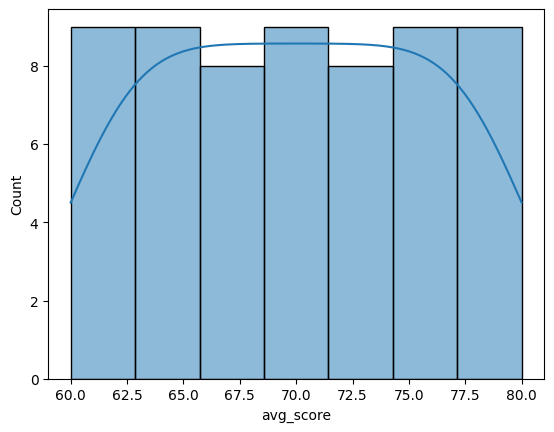

In [92]:
sns.histplot(data=t1 , x='avg_score' ,  kde=True)

In [86]:
df['avg_score'].mean()

67.77057999999998

<Axes: ylabel='Count'>

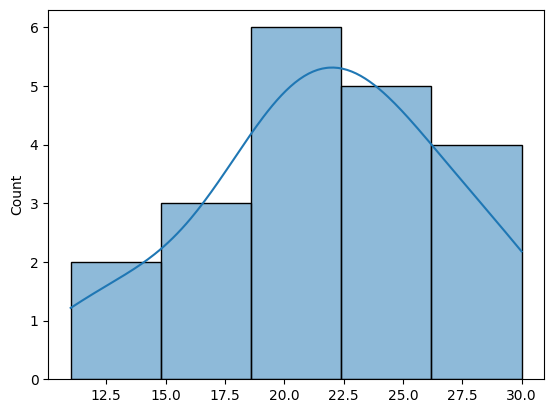

In [93]:
quiz_scores = [22, 25, 18, 19, 11, 21, 28, 30, 24, 24, 23, 15, 20, 27, 21, 21, 13, 30, 18, 25]
sns.histplot(data=quiz_scores , x=quiz_scores , bins=5 , kde=True )

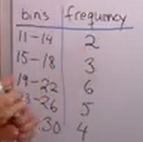

In [94]:
np.mean(quiz_scores)

21.75